In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import xmltodict
import xml.etree.ElementTree as ET
import csv
import requests
import io
import numpy as np

pd.options.display.max_rows = 12

In [2]:
xml_file = r'/Users/cody/Python/Beer/Beer2k_fixed.xml'
with open(xml_file) as fd:
    doc = xmltodict.parse(fd.read())

In [3]:
recipe_dict = {'Name': '',
               'Version':'',
               'Type': '',
               'Brewer': ''}
recipe_dict = {}
counter = 0
styles = {}

for recipe in doc['RECIPES']['RECIPE']:
    counter += 1
    
    for key in recipe.keys():
        if key == 'HOPS':
            hop_names = ''
            for h_key in recipe[key]['HOP']:
                hop_names = hop_names + ', ' + h_key['NAME'] if hop_names else h_key['NAME']
            recipe_dict['HOPS'] = hop_names
                
        else:
            recipe_dict[key] = recipe[key]
    break
print('There are %d beers in the database'%counter)
recipe_dict

There are 1 beers in the database


{u'ABV': u'4.7 %',
 u'ACTUAL_EFFICIENCY': u'72.0 %',
 u'AGE': u'30.0000000',
 u'AGE_TEMP': u'18.3333333',
 u'ASST_BREWER': None,
 u'BATCH_SIZE': u'23.0000000',
 u'BOIL_SIZE': u'25.8127168',
 u'BOIL_TIME': u'60.0000000',
 u'BREWER': u'Domi',
 u'CALORIES': u'151.6 kcal/12oz',
 u'CARBONATION': u'2.3000000',
 u'CARBONATION_TEMP': u'5.0000000',
 u'CARBONATION_USED': u'Keg with 10.59 PSI',
 u'DATE': u'07 Apr 2014',
 u'DISPLAY_AGE_TEMP': u'18.3 C',
 u'DISPLAY_BATCH_SIZE': u'6.08 gal',
 u'DISPLAY_BOIL_SIZE': u'6.82 gal',
 u'DISPLAY_CARB_TEMP': u'5.0 C',
 u'DISPLAY_FG': u'1.010 SG',
 u'DISPLAY_OG': u'1.046 SG',
 u'DISPLAY_PRIMARY_TEMP': u'19.4 C',
 u'DISPLAY_SECONDARY_TEMP': u'19.4 C',
 u'DISPLAY_TERTIARY_TEMP': u'18.3 C',
 u'EFFICIENCY': u'72.0000000',
 u'EQUIPMENT': OrderedDict([(u'NAME', u'Tout Grain !'),
              (u'VERSION', u'1'),
              (u'BOIL_SIZE', u'25.8127168'),
              (u'BATCH_SIZE', u'23.0000000'),
              (u'TUN_VOLUME', u'30.0000000'),
              (u'T

In [4]:
counter = 0
styles = {}
for recipe in doc['RECIPES']['RECIPE']:
    style = recipe['STYLE']['NAME']
    try:
        styles[style] += 1
    except KeyError:
        styles[style] = 1

styles_df = pd.DataFrame(data=styles.values(), index=styles.keys(), columns=['count'])
styles_df.sort_values(inplace=True, by=['count'], ascending=False)


/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


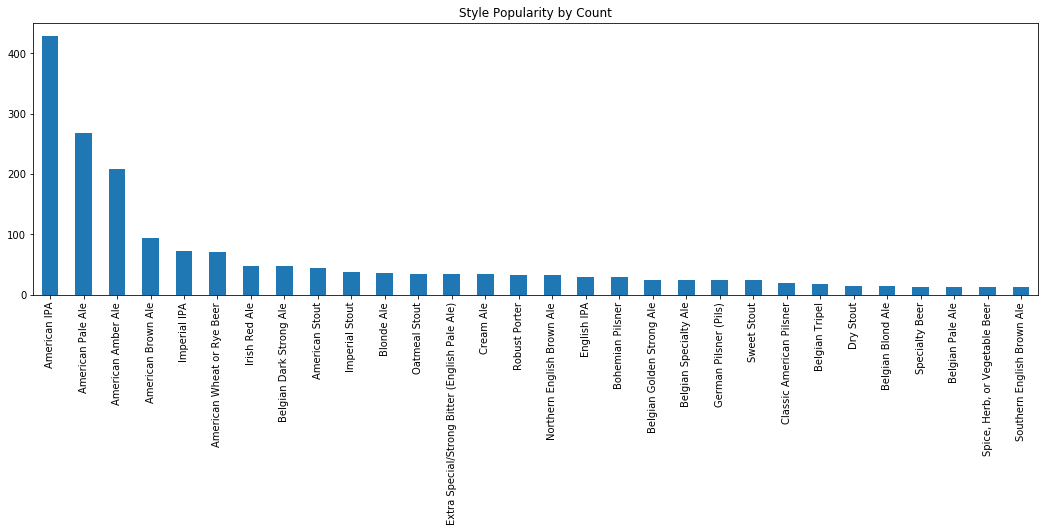

In [5]:
styles_df.ix[:30].plot(kind='bar', figsize=(18, 5), title='Style Popularity by Count', legend=False)

In [6]:
recipe_df = pd.DataFrame(doc['RECIPES']['RECIPE'])

In [7]:
recipe_df.head(2)

,NAME,VERSION,TYPE,BREWER,ASST_BREWER,BATCH_SIZE,BOIL_SIZE,BOIL_TIME,EFFICIENCY,HOPS,...,DISPLAY_BATCH_SIZE,DISPLAY_BOIL_SIZE,DISPLAY_OG,DISPLAY_FG,DISPLAY_PRIMARY_TEMP,DISPLAY_SECONDARY_TEMP,DISPLAY_TERTIARY_TEMP,DISPLAY_AGE_TEMP,MISCS,WATERS
0,#11 Caramel Amber Ale,1,All Grain,Domi,None,23.0000000,25.8127168,60.0000000,72.0000000,"{u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...",...,6.08 gal,6.82 gal,1.046 SG,1.010 SG,19.4 C,19.4 C,18.3 C,18.3 C,NaN,NaN
1,#11 Caramel Amber Ale,1,All Grain,Domi,None,23.0000000,25.8127168,60.0000000,72.0000000,"{u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...",...,6.08 gal,6.82 gal,1.046 SG,1.010 SG,19.4 C,19.4 C,18.3 C,18.3 C,NaN,NaN


In [8]:
recipe_df['HOPS']

0       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
1       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
2       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
3       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
4       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
5       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
                              ...                        
2061    {u'HOP': [{u'NAME': u'Hallertau Blanc', u'VERS...
2062    {u'HOP': [{u'NAME': u'US Hallertau Pellets', u...
2063    {u'HOP': {u'NAME': u'Sterling', u'VERSION': u'...
2064    {u'HOP': {u'NAME': u'Sterling', u'VERSION': u'...
2065    {u'HOP': [{u'NAME': u'Bravo', u'VERSION': u'1'...
2066    {u'HOP': [{u'NAME': u'Hallertauer', u'VERSION'...
Name: HOPS, Length: 2067, dtype: object

In [9]:
#Doesn't work
#recipe_df['HOPS_NAME'] = 0
#for i in range(len(recipe_df)):
#    recipe_df['HOPS_NAME'][i] = recipe_df['HOPS'][i]['NAME']

In [10]:
recipe_df.drop(['HOPS'],axis=1);

In [11]:
recipe_df.columns

Index([u'NAME', u'VERSION', u'TYPE', u'BREWER', u'ASST_BREWER', u'BATCH_SIZE',
       u'BOIL_SIZE', u'BOIL_TIME', u'EFFICIENCY', u'HOPS', u'FERMENTABLES',
       u'YEASTS', u'STYLE', u'EQUIPMENT', u'MASH', u'NOTES', u'TASTE_NOTES',
       u'TASTE_RATING', u'OG', u'FG', u'CARBONATION', u'FERMENTATION_STAGES',
       u'PRIMARY_AGE', u'PRIMARY_TEMP', u'SECONDARY_AGE', u'SECONDARY_TEMP',
       u'TERTIARY_AGE', u'AGE', u'AGE_TEMP', u'CARBONATION_USED',
       u'FORCED_CARBONATION', u'PRIMING_SUGAR_NAME', u'PRIMING_SUGAR_EQUIV',
       u'KEG_PRIMING_FACTOR', u'CARBONATION_TEMP', u'DISPLAY_CARB_TEMP',
       u'DATE', u'EST_OG', u'EST_FG', u'EST_COLOR', u'IBU', u'IBU_METHOD',
       u'EST_ABV', u'ABV', u'ACTUAL_EFFICIENCY', u'CALORIES',
       u'DISPLAY_BATCH_SIZE', u'DISPLAY_BOIL_SIZE', u'DISPLAY_OG',
       u'DISPLAY_FG', u'DISPLAY_PRIMARY_TEMP', u'DISPLAY_SECONDARY_TEMP',
       u'DISPLAY_TERTIARY_TEMP', u'DISPLAY_AGE_TEMP', u'MISCS', u'WATERS'],
      dtype='object')

Marvel at the genius below

In [12]:
recipe_df['BEER_STYLE'] = 0
for i in range(len(recipe_df)):
    recipe_df['BEER_STYLE'][i] = recipe_df['STYLE'][i]['NAME']

/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
recipe_df['BEER_STYLE']

0       American Amber Ale
1       American Amber Ale
2       American Amber Ale
3       American Amber Ale
4       American Amber Ale
5       American Amber Ale
               ...        
2061               Witbier
2062               Witbier
2063               Witbier
2064               Witbier
2065               Witbier
2066               Witbier
Name: BEER_STYLE, Length: 2067, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
Beer_Style_enc = le.fit_transform(recipe_df['BEER_STYLE'])

In [17]:
recipe_df['BEER_STYLE_LE'] = Beer_Style_enc

In [18]:
recipe_df.shape

(2067, 58)

In [19]:
test2 = recipe_df.columns[-2:]

In [20]:
test2

Index([u'BEER_STYLE', u'BEER_STYLE_LE'], dtype='object')

In [21]:
recipe_df[test2]

,BEER_STYLE,BEER_STYLE_LE
0,American Amber Ale,0
1,American Amber Ale,0
2,American Amber Ale,0
3,American Amber Ale,0
4,American Amber Ale,0
5,American Amber Ale,0
...,...,...
2061,Witbier,110
2062,Witbier,110
2063,Witbier,110


In [22]:
recipe_df.columns

Index([                  u'NAME',                u'VERSION',
                         u'TYPE',                 u'BREWER',
                  u'ASST_BREWER',             u'BATCH_SIZE',
                    u'BOIL_SIZE',              u'BOIL_TIME',
                   u'EFFICIENCY',                   u'HOPS',
                 u'FERMENTABLES',                 u'YEASTS',
                        u'STYLE',              u'EQUIPMENT',
                         u'MASH',                  u'NOTES',
                  u'TASTE_NOTES',           u'TASTE_RATING',
                           u'OG',                     u'FG',
                  u'CARBONATION',    u'FERMENTATION_STAGES',
                  u'PRIMARY_AGE',           u'PRIMARY_TEMP',
                u'SECONDARY_AGE',         u'SECONDARY_TEMP',
                 u'TERTIARY_AGE',                    u'AGE',
                     u'AGE_TEMP',       u'CARBONATION_USED',
           u'FORCED_CARBONATION',     u'PRIMING_SUGAR_NAME',
          u'PRIMING_SUGA

In [23]:
ABV_enc = le.fit_transform(recipe_df['ABV'])

In [24]:
recipe_df['ABV_LE'] = ABV_enc

In [25]:
import seaborn as sns

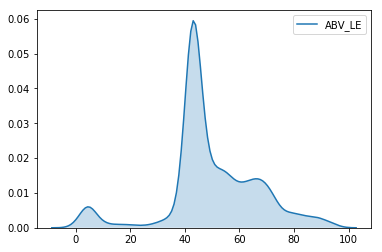

In [26]:
#f = sns.distplot(recipe_df['ABV_LE'])
sns.kdeplot(recipe_df['ABV_LE'], shade=True);

In [27]:
ABV_check = recipe_df['ABV']

In [28]:
ABV_check.to_csv('\Users\cody\python\Beer\ABV.csv')

In [29]:
ABV_check.mode()

0    4.7 %
dtype: object

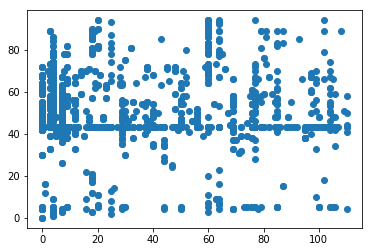

In [30]:
f, ax = plt.subplots()
plt.scatter(recipe_df['BEER_STYLE_LE'], recipe_df['ABV_LE'])

In [31]:
recipe_df[['ABV', 'ABV_LE', 'BEER_STYLE', 'BEER_STYLE_LE']]

,ABV,ABV_LE,BEER_STYLE,BEER_STYLE_LE
0,4.7 %,43,American Amber Ale,0
1,4.7 %,43,American Amber Ale,0
2,4.7 %,43,American Amber Ale,0
3,4.7 %,43,American Amber Ale,0
4,4.7 %,43,American Amber Ale,0
5,4.7 %,43,American Amber Ale,0
...,...,...,...,...
2061,5.4 %,50,Witbier,110
2062,6.2 %,58,Witbier,110
2063,4.7 %,43,Witbier,110


In [32]:
recipe_df['HOPS'].keys

<bound method Series.keys of 0       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
1       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
2       {u'HOP': [{u'NAME': u'Target', u'VERSION': u'1...
3       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
4       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
5       {u'HOP': [{u'NAME': u'Cascade', u'VERSION': u'...
                              ...                        
2061    {u'HOP': [{u'NAME': u'Hallertau Blanc', u'VERS...
2062    {u'HOP': [{u'NAME': u'US Hallertau Pellets', u...
2063    {u'HOP': {u'NAME': u'Sterling', u'VERSION': u'...
2064    {u'HOP': {u'NAME': u'Sterling', u'VERSION': u'...
2065    {u'HOP': [{u'NAME': u'Bravo', u'VERSION': u'1'...
2066    {u'HOP': [{u'NAME': u'Hallertauer', u'VERSION'...
Name: HOPS, Length: 2067, dtype: object>

In [33]:
#Will need to drop entries with no HOPS info
#len(recipe_df['HOPS'][99]['HOP'])
recipe_df['HOPS'][1]['HOP']

[OrderedDict([(u'NAME', u'Target'),
              (u'VERSION', u'1'),
              (u'ORIGIN', u'United Kingdom'),
              (u'ALPHA', u'11.0000000'),
              (u'AMOUNT', u'0.0283495'),
              (u'USE', u'Boil'),
              (u'TIME', u'60.0000000'),
              (u'NOTES',
               u'Used for: English ales and lagers\nAroma: Robust aroma and flavor\nSubstitutes: East Kent Goldings'),
              (u'TYPE', u'Bittering'),
              (u'FORM', u'Leaf'),
              (u'BETA', u'5.0000000'),
              (u'HSI', u'50.0000000'),
              (u'DISPLAY_AMOUNT', u'1.00 oz'),
              (u'INVENTORY', u'0.00 oz'),
              (u'DISPLAY_TIME', u'60.0 min')]),
 OrderedDict([(u'NAME', u'Sterling'),
              (u'VERSION', u'1'),
              (u'ORIGIN', u'U.S.'),
              (u'ALPHA', u'7.5000000'),
              (u'AMOUNT', u'0.0566990'),
              (u'USE', u'Boil'),
              (u'TIME', u'0.0000000'),
              (u'NOTES',
           

In [34]:
# Seems to remove rows where HOPS columns are empty
recipe_df2 = recipe_df[pd.notnull(recipe_df['HOPS'])]

In [35]:
# Need to reset index?

In [36]:
recipe_df2.reset_index(drop=True, inplace=True);

In [88]:
recipe_df2['HOPS'][0]['HOP'][0]['NAME']

u'Target'

In [38]:
# Dropped problematic HOPS with nans and reset index
recipe_df2['HOPS_LEN'] = 0
for i in range(20):
#for i in range(len(recipe_df2)):
    for j in range(len(recipe_df2['HOPS'][i]['HOP'])):
        recipe_df2['HOPS_LEN'][i] = len(recipe_df2['HOPS'][j]['HOP'])

/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

In [79]:
recipe_df2['HOPS_LEN'][0]

2

In [195]:
ph = {}
#for i in range(len(recipe_df2['HOPS'][0]['HOP'])):
for i in range(20):
    for j in range(recipe_df2['HOPS_LEN'][i]):
        ph[i,j] = recipe_df2['HOPS'][i]['HOP'][j]['NAME']

In [189]:
test2 = sorted(ph.items())

In [190]:
testdf = pd.DataFrame(test2)

In [211]:
testdf

,0,1
0,"(0, 0)",Target
1,"(0, 1)",Sterling
2,"(1, 0)",Target
3,"(1, 1)",Sterling
4,"(2, 0)",Target
5,"(2, 1)",Sterling
...,...,...
36,"(18, 0)",Chinook
37,"(18, 1)",Cascade
38,"(18, 2)",Centennial


In [32]:
# The for loop version of converting IBUs to numbers
recipe_df['IBU_fl'] = 0
#for i in range(10):
for i in range(len(recipe_df['IBU'])):
    ph = recipe_df['IBU'][i]
    recipe_df['IBU_fl'][i] = filter(lambda x: x.isdigit(), ph)
recipe_df['IBU_fl'] = recipe_df['IBU_fl']/10

/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [33]:
recipe_df['IBU_fl']

0       33.8
1       33.8
2       33.8
3       20.8
4       20.8
5       20.8
        ... 
2061     0.0
2062     0.0
2063     0.0
2064     0.0
2065     0.0
2066     0.0
Name: IBU_fl, Length: 2067, dtype: float64

In [84]:
recipe_df3 = recipe_df[pd.notnull(recipe_df['YEASTS'])]
recipe_df3.reset_index(drop=True, inplace=True);
recipe_df3['YEASTS_str'] = 0
for i in range(30):
#for i in range(len(recipe_df3['YEASTS'])):
    recipe_df3['YEASTS_str'][i] = recipe_df3['YEASTS'][i]['YEAST']['NAME']
recipe_df3['YEASTS_str']

/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0       Safale American
1       Safale American
2       Safale American
3       Safale American
4       Safale American
5       Safale American
             ...       
1932                  0
1933                  0
1934                  0
1935                  0
1936                  0
1937                  0
Name: YEASTS_str, Length: 1938, dtype: object

In [85]:
recipe_df3['YEASTS_str'][0:30]

0           Safale American
1           Safale American
2           Safale American
3           Safale American
4           Safale American
5           Safale American
              ...          
24            Edinburgh Ale
25            Edinburgh Ale
26            Edinburgh Ale
27    San Diego Super Yeast
28    San Diego Super Yeast
29    San Diego Super Yeast
Name: YEASTS_str, Length: 30, dtype: object

In [86]:
# The for loop version of converting ABVs to numbers (drops the %)  MUCH less efficient than LE, but more interpretable
recipe_df['ABV_fl'] = 0
for i in range(10):
#for i in range(len(recipe_df['IBU'])):
    ph = recipe_df['ABV'][i]
    recipe_df['ABV_fl'][i] = filter(lambda x: x.isdigit(), ph)
recipe_df['ABV_fl'] = recipe_df['ABV_fl']/10

/Users/cody/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [87]:
recipe_df['ABV_fl']

0       4.7
1       4.7
2       4.7
3       4.7
4       4.7
5       4.7
       ... 
2061    0.0
2062    0.0
2063    0.0
2064    0.0
2065    0.0
2066    0.0
Name: ABV_fl, Length: 2067, dtype: float64